## import  necessary lib 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from pycaret.regression import *
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from pycaret.regression import setup, compare_models, create_model, evaluate_model, finalize_model, save_model, load_model, predict_model
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load the data 

In [2]:
df = pd.read_csv(
    r"C:\Users\Hp\Desktop\ML project data sets\Regression dataset\HDBdata with district_coord_dist_full_corrected2.csv")

In [3]:
print(df.shape)

(113959, 18)


## Display the first few rows of data

In [4]:
df.head()

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,858.575938
1,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,1370.233958
2,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,896.538505
3,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,942.352562
4,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,856.601041


## provides five summary numbers

In [5]:
df.describe()

,District,District.1,floor_area_sqm,lease_commence_date,resale_price,Price/sqm,Latitude,Longitude,mrtdist
count,113959.000000,113959.000000,113959.000000,113959.000000,1.139590e+05,113959.000000,113959.000000,113959.000000,113959.000000
mean,18.847498,18.818084,97.859061,1995.010477,4.579615e+05,4713.508969,1.367317,103.842270,1130.106043
std,6.281778,6.328647,24.147210,13.395018,1.585219e+05,1275.304605,0.042705,0.071347,615.371712
min,1.000000,1.000000,31.000000,1966.000000,1.400000e+05,2089.552239,1.270369,103.685206,44.416611
25%,18.000000,18.000000,82.000000,1985.000000,3.420000e+05,3870.967742,1.336750,103.780243,636.790261
50%,19.000000,19.000000,95.000000,1995.000000,4.280000e+05,4408.602151,1.367785,103.848998,1038.576697
75%,23.000000,23.000000,113.000000,2005.000000,5.400000e+05,5169.651423,1.395605,103.899620,1565.223916
max,28.000000,28.000000,249.000000,2019.000000,1.295000e+06,12903.225810,1.459192,103.987631,5045.442667


## calculates the number of duplicate 

In [6]:
df.duplicated().sum()

297

#### drop_duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Displays the missing values 

In [9]:
df.isna().sum()

District               0
District info          0
District.1             0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
Price/sqm              0
Latitude               0
Longitude              0
mrtdist                0
dtype: int64

In [10]:
df[df.mrtdist.isna()]

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist


### this column in data set have a a lot of NAN so we will drop it 

In [11]:
len(df['mrtdist']=='NAN')

113662

In [12]:
df = df.drop('mrtdist', axis=1)

In [13]:
df.describe()

,District,District.1,floor_area_sqm,lease_commence_date,resale_price,Price/sqm,Latitude,Longitude
count,113662.000000,113662.000000,113662.000000,113662.000000,1.136620e+05,113662.000000,113662.000000,113662.000000
mean,18.846659,18.817256,97.869241,1995.000783,4.579932e+05,4713.204915,1.367307,103.842246
std,6.283607,6.330492,24.158229,13.389716,1.586575e+05,1275.946693,0.042713,0.071352
min,1.000000,1.000000,31.000000,1966.000000,1.400000e+05,2089.552239,1.270369,103.685206
25%,18.000000,18.000000,82.000000,1985.000000,3.420000e+05,3870.967742,1.336746,103.780197
50%,19.000000,19.000000,95.000000,1995.000000,4.270000e+05,4408.602151,1.367717,103.848998
75%,23.000000,23.000000,113.000000,2005.000000,5.400000e+05,5170.006305,1.395602,103.899583
max,28.000000,28.000000,249.000000,2019.000000,1.295000e+06,12903.225810,1.459192,103.987631


In [14]:
df.head()

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude
0,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640
1,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238
2,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425
3,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175
4,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076


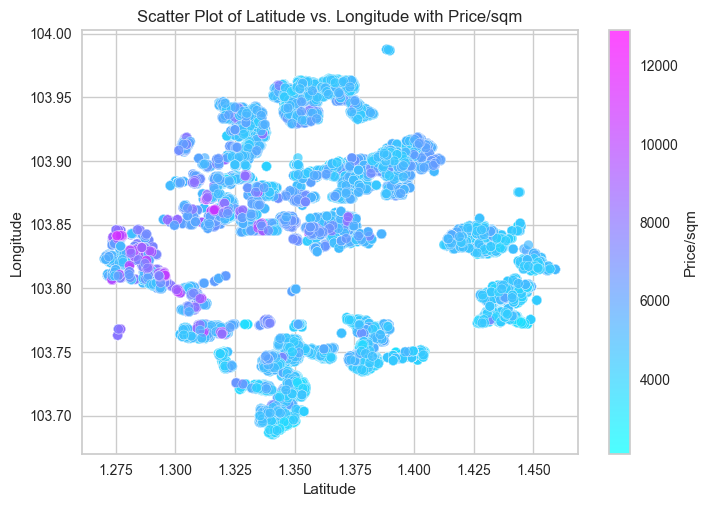

In [15]:
scatter = plt.scatter(
    x=df['Latitude'],
    y=df['Longitude'],
    c=df['Price/sqm'],
    cmap='cool',
    s=50,  
    alpha=0.7,  
    edgecolors='w',  
cbar = plt.colorbar(scatter)
cbar.set_label('Price/sqm')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs. Longitude with Price/sqm')

plt.show()

The code creates a scatter plot with Latitude on the x-axis, Longitude on the y-axis, and marker color representing Price/sqm, utilizing Matplotlib's 'cool' colormap, adjusting marker size and transparency, adding a colorbar, and setting labels and a title.

In [16]:
df.drop(columns=['town', 'lease_commence_date', 'Price/sqm', 'District info', 'District.1'], inplace=True)
df.District = df.District.astype(str)
df.drop(columns=['street_name', 'block'], inplace=True)

The code drops specified columns ('town', 'lease_commence_date', 'Price/sqm', 'District info', 'District.1') from the DataFrame, converts the 'District' column to a string data type, and then drops additional columns ('street_name', 'block') from the DataFrame.


###  shows a sample of the data after cleaning 

In [17]:
df.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,Latitude,Longitude
0,20,1 01 2017,2 ROOM,10 TO 12,44.0,Improved,61,232000.0,1.375748,103.854640
1,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,60,250000.0,1.369525,103.837238
2,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,262000.0,1.380760,103.835425
3,20,1 01 2017,3 ROOM,04 TO 06,68.0,New Generation,62,265000.0,1.366213,103.857175
4,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,265000.0,1.380987,103.835076


In [18]:
 df.shape[1]

10

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113662 entries, 0 to 113958
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   District         113662 non-null  object 
 1   month            113662 non-null  object 
 2   flat_type        113662 non-null  object 
 3   storey_range     113662 non-null  object 
 4   floor_area_sqm   113662 non-null  float64
 5   flat_model       113662 non-null  object 
 6   remaining_lease  113662 non-null  object 
 7   resale_price     113662 non-null  float64
 8   Latitude         113662 non-null  float64
 9   Longitude        113662 non-null  float64
dtypes: float64(4), object(6)
memory usage: 9.5+ MB


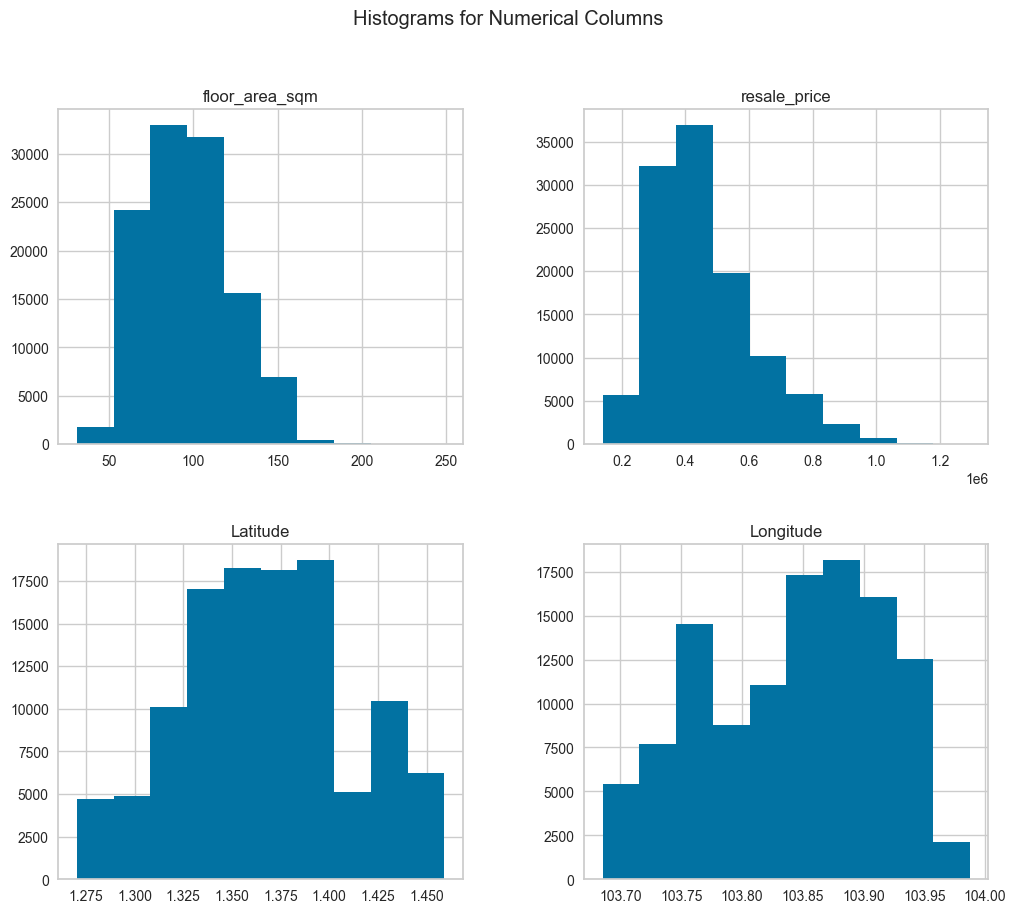

In [20]:
df.hist(figsize=(12, 10))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

generates histograms for numerical columns in the DataFrame, displaying them in a grid with a specified figure size and a common title.

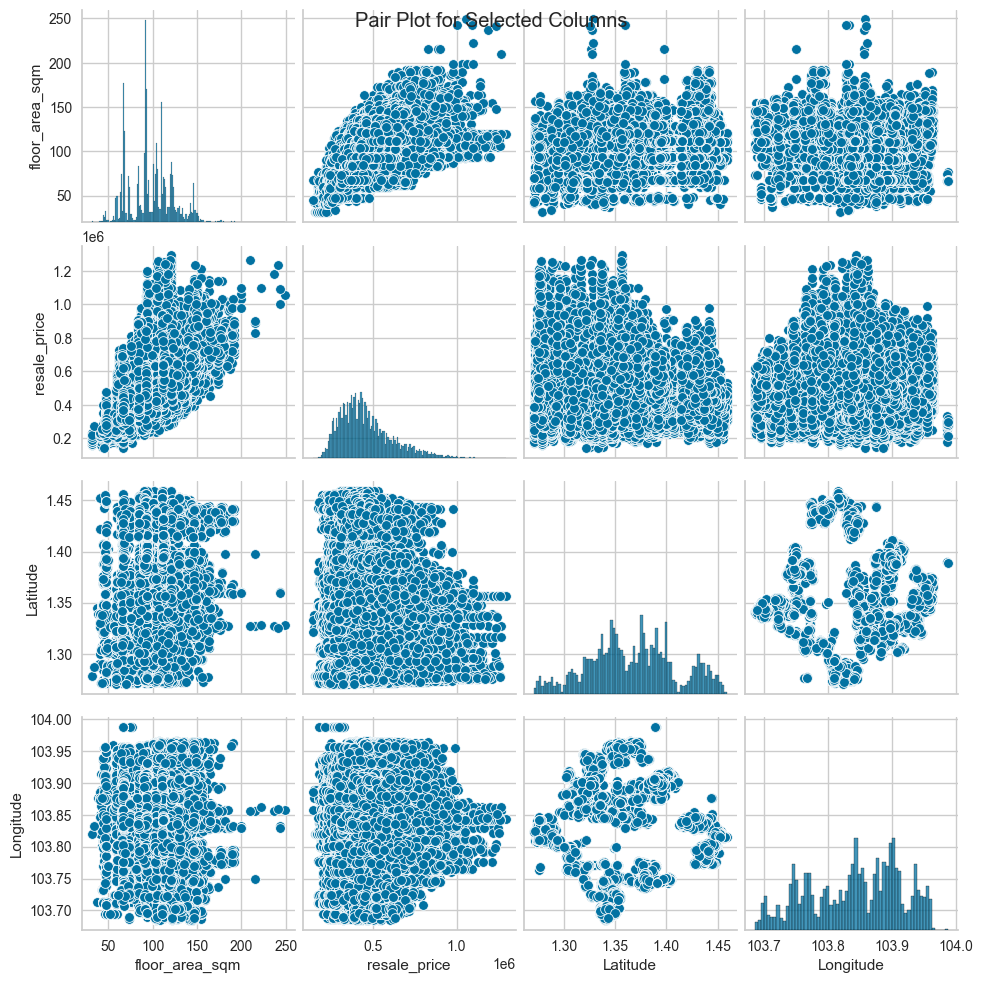

In [21]:
selected_columns = ['floor_area_sqm', 'resale_price', 'Latitude', 'Longitude']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot for Selected Columns')
plt.show()

creates a pair plot for selected numerical columns ('floor_area_sqm', 'resale_price', 'Latitude', 'Longitude') in the DataFrame using Seaborn, displaying pairwise relationships and distributions with a common title.

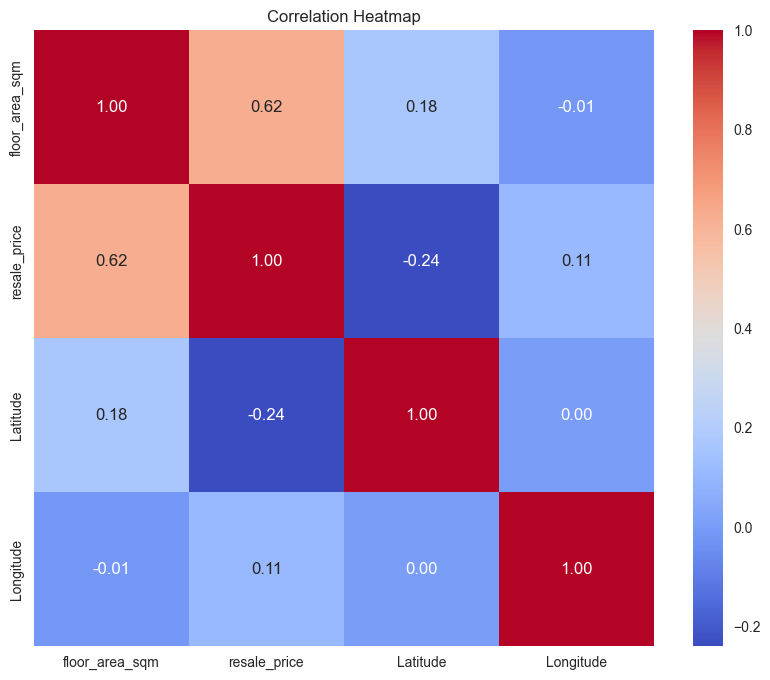

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

generates a correlation heatmap for numerical columns in the DataFrame using Seaborn, displaying correlation coefficients with annotations and a coolwarm color map.

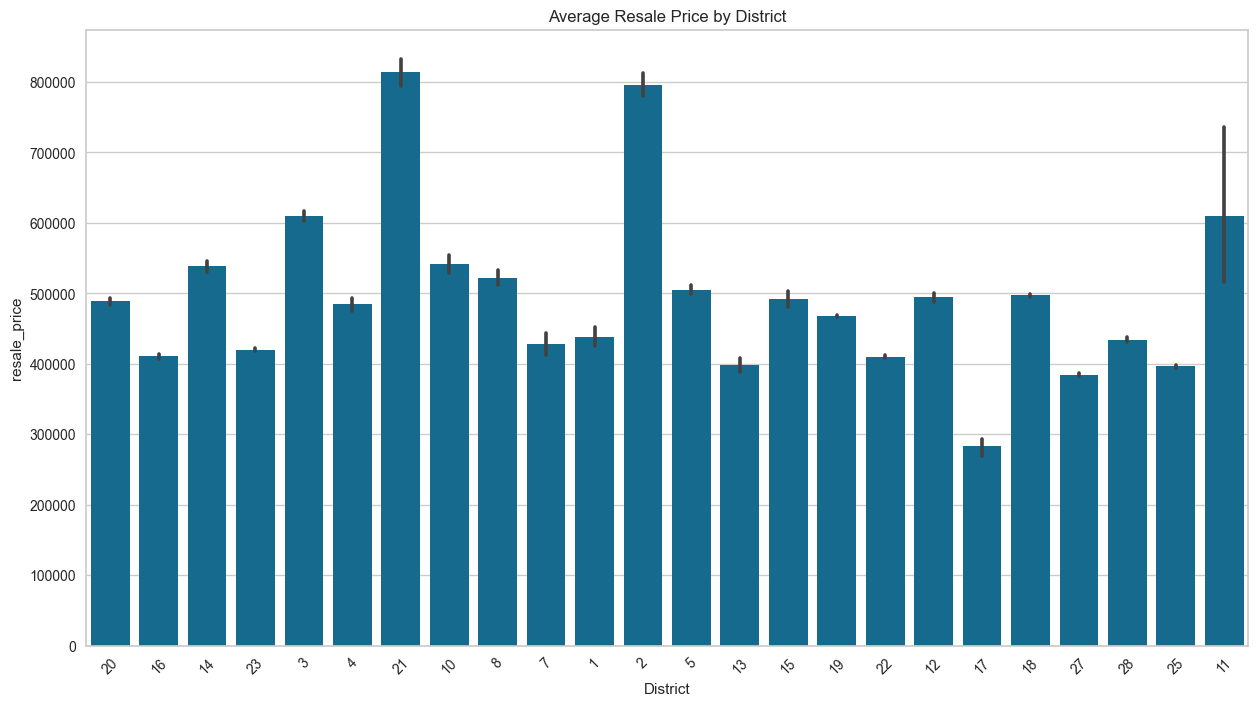

In [23]:
plt.figure(figsize=(15, 8))
sns.barplot(x='District', y='resale_price', data=df)
plt.title('Average Resale Price by District')
plt.xticks(rotation=45)
plt.show()

creates a bar plot showing the average resale price for each district in the DataFrame using Seaborn, with rotated district labels on the x-axis.

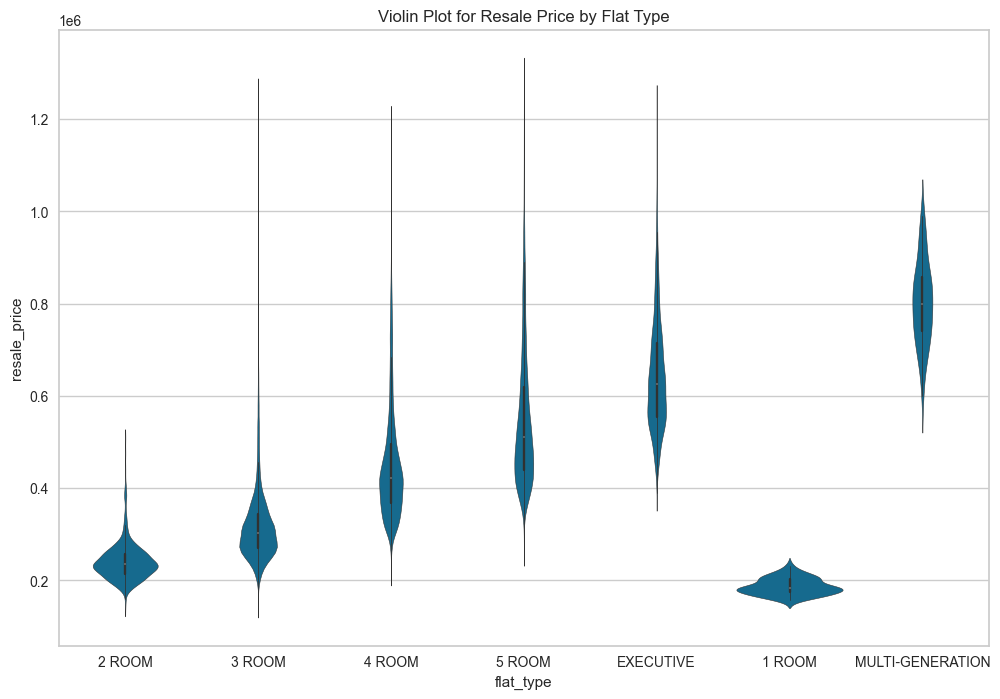

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='flat_type', y='resale_price', data=df)
plt.title('Violin Plot for Resale Price by Flat Type')
plt.show()

generates a violin plot to visualize the distribution of resale prices across different flat types in the DataFrame using Seaborn.

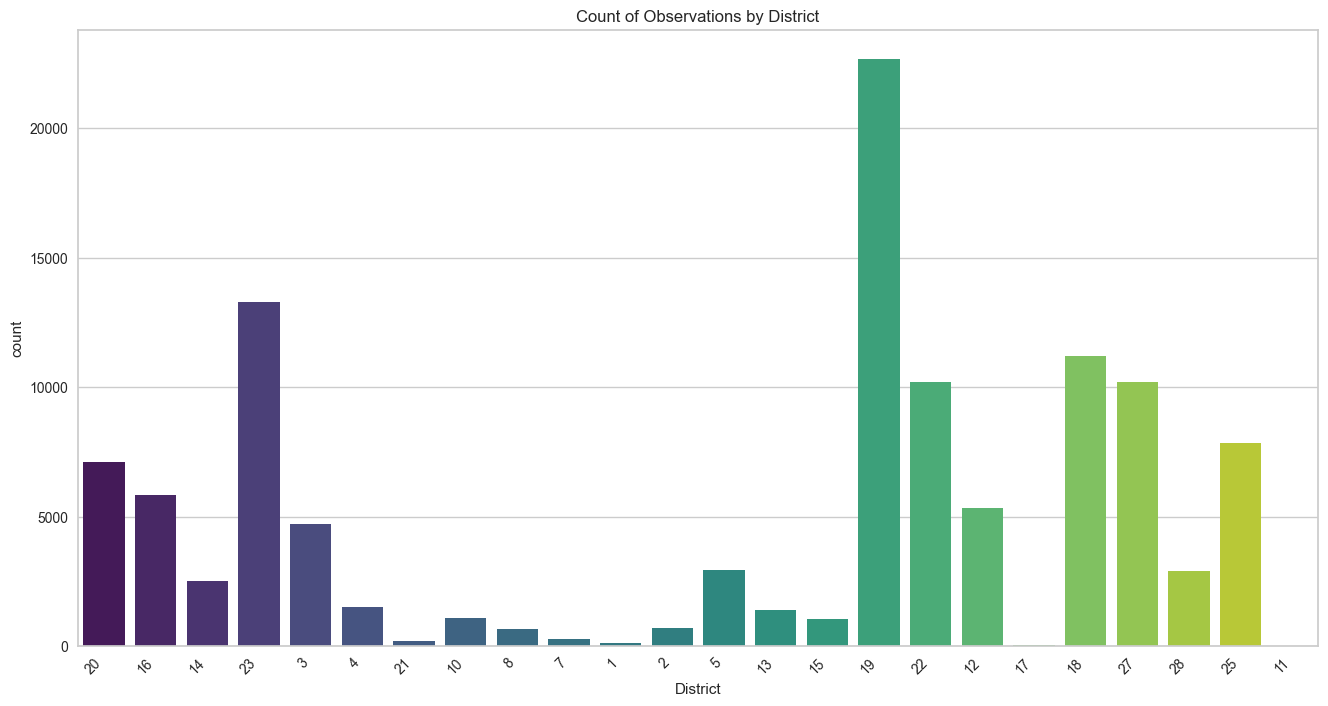

In [28]:
plt.figure(figsize=(16, 8))
sns.countplot(x='District', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Observations by District')
plt.show()

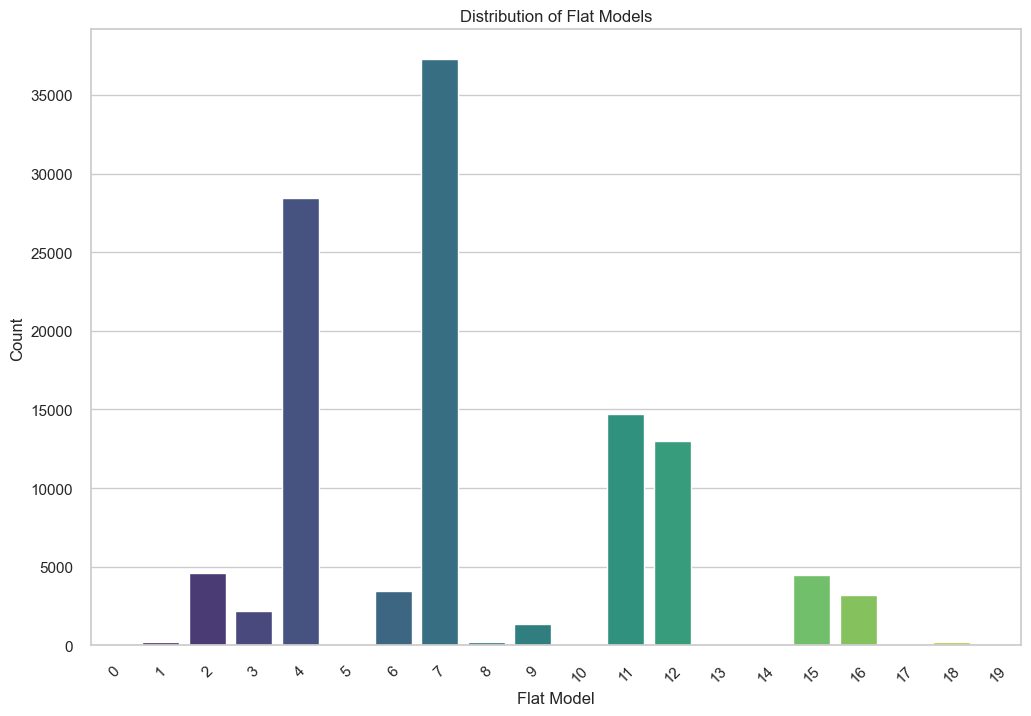

In [145]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(x='flat_model', data=df, palette='viridis')
plt.title('Distribution of Flat Models')
plt.xlabel('Flat Model')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

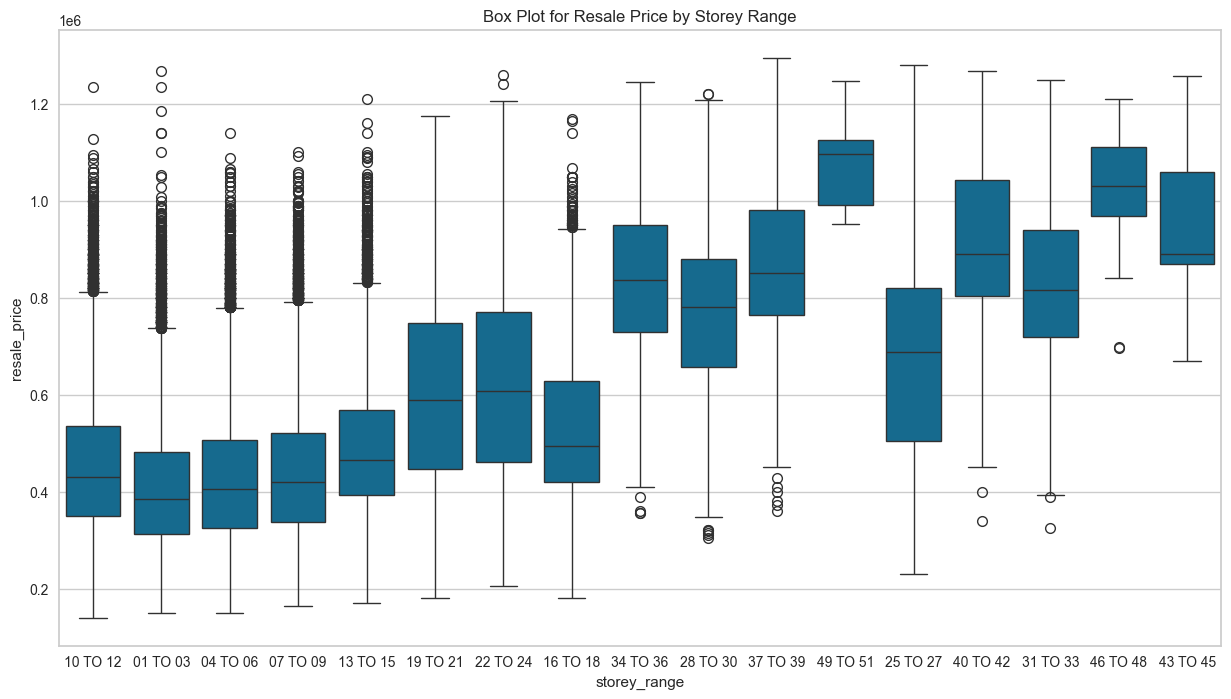

In [29]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='storey_range', y='resale_price', data=df)
plt.title('Box Plot for Resale Price by Storey Range')
plt.show()

creates a box plot to illustrate the distribution of resale prices across different storey ranges in the DataFrame.

In [30]:
df['Price_ln']=df['resale_price'].apply(np.log)
df=df.drop('resale_price',axis=1)
df

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,Latitude,Longitude,Price_ln
0,20,1 01 2017,2 ROOM,10 TO 12,44.0,Improved,61,1.375748,103.854640,12.354493
1,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,60,1.369525,103.837238,12.429216
2,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,1.380760,103.835425,12.476100
3,20,1 01 2017,3 ROOM,04 TO 06,68.0,New Generation,62,1.366213,103.857175,12.487485
4,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,1.380987,103.835076,12.487485
...,...,...,...,...,...,...,...,...,...,...
113954,27,1 11 2021,EXECUTIVE,10 TO 12,144.0,Apartment,65,1.420576,103.832406,13.444447
113955,27,1 11 2021,EXECUTIVE,10 TO 12,142.0,Apartment,65,1.420169,103.835955,13.429848
113956,27,1 11 2021,EXECUTIVE,01 TO 03,142.0,Apartment,65,1.419741,103.836178,13.356645
113957,27,1 11 2021,EXECUTIVE,01 TO 03,145.0,Maisonette,66,1.414324,103.838877,13.534473


calculates the natural logarithm of the 'resale_price' column and assigns it to a new column 'Price_ln'. Then, it drops the original 'resale_price' column from the DataFrame, resulting in a DataFrame with the log-transformed resale prices.

# Start built the models

In [31]:
!pip install --upgrade pycaret

In [32]:
regression_setup = setup(data=df, target='Price_ln', session_id=42)
best_model = compare_models()
model = create_model(best_model)
evaluate_model(model)
final_model = finalize_model(model)
save_model(final_model, 'regression_model')
loaded_model = load_model('regression_model')
predictions = predict_model(loaded_model, data=df)

,Description,Value
0,Session id,42
1,Target,Price_ln
2,Target type,Regression
3,Original data shape,"(113662, 10)"
4,Transformed data shape,"(113662, 74)"
5,Transformed train set shape,"(79563, 74)"
6,Transformed test set shape,"(34099, 74)"
7,Numeric features,3
8,Categorical features,6
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0449,0.0037,0.0605,0.9666,0.0043,0.0035,22.2620
et,Extra Trees Regressor,0.0462,0.0039,0.0621,0.9648,0.0045,0.0036,28.3710
xgboost,Extreme Gradient Boosting,0.0495,0.0042,0.0649,0.9616,0.0047,0.0038,1.5120
lightgbm,Light Gradient Boosting Machine,0.0569,0.0055,0.0743,0.9497,0.0053,0.0044,1.0900
dt,Decision Tree Regressor,0.0613,0.0070,0.0838,0.9359,0.0060,0.0047,0.7390
knn,K Neighbors Regressor,0.0674,0.0085,0.0922,0.9224,0.0066,0.0052,2.5830
gbr,Gradient Boosting Regressor,0.0803,0.0107,0.1033,0.9027,0.0074,0.0062,8.6080
lr,Linear Regression,0.0966,0.0145,0.1206,0.8673,0.0086,0.0074,1.2400
br,Bayesian Ridge,0.0966,0.0145,0.1206,0.8673,0.0086,0.0074,0.8720
ridge,Ridge Regression,0.0966,0.0146,0.1207,0.8672,0.0086,0.0074,0.3970


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0451,0.0037,0.0607,0.9665,0.0044,0.0035
1,0.0441,0.0035,0.0589,0.9672,0.0042,0.0034
2,0.0451,0.0037,0.0606,0.9673,0.0044,0.0035
3,0.0444,0.0036,0.0603,0.9668,0.0043,0.0034
4,0.0452,0.0037,0.0609,0.9659,0.0044,0.0035
5,0.0455,0.0037,0.0609,0.9665,0.0044,0.0035
6,0.0449,0.0037,0.0604,0.9671,0.0043,0.0035
7,0.0446,0.0036,0.0598,0.9667,0.0043,0.0034
8,0.0454,0.0038,0.0617,0.9654,0.0044,0.0035


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0165,0.0005,0.0225,0.9954,0.0016,0.0013


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113662 entries, 0 to 113958
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   District         113662 non-null  object 
 1   month            113662 non-null  object 
 2   flat_type        113662 non-null  object 
 3   storey_range     113662 non-null  object 
 4   floor_area_sqm   113662 non-null  float64
 5   flat_model       113662 non-null  object 
 6   remaining_lease  113662 non-null  object 
 7   Latitude         113662 non-null  float64
 8   Longitude        113662 non-null  float64
 9   Price_ln         113662 non-null  float64
dtypes: float64(4), object(6)
memory usage: 13.6+ MB


# Building Models

### Random Forest Regression 

In [91]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

In [92]:
X = df.drop('Price_ln', axis=1)
y = df['Price_ln']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
rf_model = RandomForestRegressor(random_state=42)

In [95]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R^2 Score: 0.9615072873951127
Mean Absolute Error (MAE): 0.047832900325521184
Mean Squared Error (MSE): 0.004169051745893491
Root Mean Squared Error (RMSE): 0.06456819453797273


In [97]:
rf_model.score(X_test, y_test)

0.9615072873951127

### Hyperparameter tuning for Random Forest Regression

In [98]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

In [99]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [101]:
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [102]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Best Hyperparameters: {best_params}")
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
R^2 Score: 0.9618036135608193
Mean Absolute Error (MAE): 0.047699790648722686
Mean Squared Error (MSE): 0.004136957382184345
Root Mean Squared Error (RMSE): 0.0643191836249835


In [103]:
best_model.score(X_test, y_test)

0.9618036135608193

### Extra Trees Regression model

In [104]:
extra_trees_model = ExtraTreesRegressor(random_state=42)

In [105]:
extra_trees_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [106]:
y_pred = extra_trees_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R^2: 0.9603428719962539
MAE: 0.04849577832907053
MSE: 0.004295166735538092
RMSE: 0.0655375215852575


In [107]:
extra_trees_model.score(X_test, y_test)

0.9603428719962539

### Decision Tree Regression model 

In [108]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [109]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [110]:
y_pred = decision_tree_model.predict(X_test)

# Calculate and print metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R^2: 0.9267081064802054
MAE: 0.06479794525924086
MSE: 0.007938066089936836
RMSE: 0.08909582532272113


In [111]:
decision_tree_model.score(X_test, y_test)

0.9267081064802054

### Linear Regression model

In [112]:
linear_model = LinearRegression()

In [113]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R^2: 0.776708998897254
MAE: 0.12373992266348557
MSE: 0.024184103301452316
RMSE: 0.15551238954325253


In [115]:
linear_model.score(X_test, y_test)

0.776708998897254

### K Neighbors Regression model 

In [116]:
knn_model = KNeighborsRegressor()

In [117]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [118]:
y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R^2: 0.8659644371540212
MAE: 0.08565294137816812
MSE: 0.01451706464625453
RMSE: 0.12048678203958528


In [119]:
knn_model.score(X_test, y_test)

0.8659644371540212

### Xgboost Regression model

In [120]:
xgb_model = XGBRegressor()

In [121]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R^2: 0.9627400836475436
MAE: 0.04783761076819606
MSE: 0.004035530592908415
RMSE: 0.0635258261883182


In [123]:
xgb_model.score(X_test, y_test)

0.9627400836475436

###  Hyperparameter tuning Xgboost Regression model

In [124]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Best Hyperparameters: {best_params}")
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
R^2 Score: 0.9693230583534648
Mean Absolute Error (MAE): 0.043153885535945215
Mean Squared Error (MSE): 0.0033225446708040588
Root Mean Squared Error (RMSE): 0.057641518637212


In [125]:
best_model.score(X_test, y_test)

0.9693230583534648

### Pipline for 5 models 

In [126]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('Price_ln', axis=1)
y = df['Price_ln']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

extra_trees_model = ExtraTreesRegressor(random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
linear_model = LinearRegression()
knn_model = KNeighborsRegressor()
xgb_model = XGBRegressor()

extra_trees_pipeline = Pipeline([
    ('model', extra_trees_model)
])

decision_tree_pipeline = Pipeline([
    ('model', decision_tree_model)
])

linear_pipeline = Pipeline([
    ('model', linear_model)
])

knn_pipeline = Pipeline([
    ('model', knn_model)
])

xgb_pipeline = Pipeline([
    ('model', xgb_model)
])

pipelines = [extra_trees_pipeline, decision_tree_pipeline, linear_pipeline, knn_pipeline, xgb_pipeline]

for i, pipeline in enumerate(pipelines, start=1):
    print(f"Model {i}:")
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f'R^2: {r2}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print("\n" + "="*30 + "\n")


Model 1:
R^2: 0.9603428719962539
MAE: 0.04849577832907053
MSE: 0.004295166735538092
RMSE: 0.0655375215852575


Model 2:
R^2: 0.9267081064802054
MAE: 0.06479794525924086
MSE: 0.007938066089936836
RMSE: 0.08909582532272113


Model 3:
R^2: 0.776708998897254
MAE: 0.12373992266348557
MSE: 0.024184103301452316
RMSE: 0.15551238954325253


Model 4:
R^2: 0.8659644371540212
MAE: 0.08565294137816812
MSE: 0.01451706464625453
RMSE: 0.12048678203958528


Model 5:
R^2: 0.9627400836475436
MAE: 0.04783761076819606
MSE: 0.004035530592908415
RMSE: 0.0635258261883182




In [127]:
knn_model.score(X_test, y_test)

0.8659644371540212

In [128]:
xgb_model.score(X_test, y_test)

0.9627400836475436

In [129]:
linear_model.score(X_test, y_test)

0.776708998897254

In [130]:
extra_trees_model.score(X_test, y_test)

0.9603428719962539

In [131]:
decision_tree_model.score(X_test, y_test)

0.9267081064802054

### Pipline for Random Forest Regression

In [132]:
from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('Price_ln', axis=1)
y = df['Price_ln']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R^2 Score: 0.9615692469346965
Mean Absolute Error (MAE): 0.0478104792226834
Mean Squared Error (MSE): 0.0041623410593973845
Root Mean Squared Error (RMSE): 0.06451620772641077


In [133]:
pipeline.score(X_test, y_test)

0.9615692469346965

# Get feature importances

In [134]:
feature_importances = best_model.feature_importances_

# Visualize feature importances
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

           Feature  Importance
2        flat_type    0.559151
4   floor_area_sqm    0.164803
0         District    0.068727
7         Latitude    0.063264
5       flat_model    0.042477
6  remaining_lease    0.041931
8        Longitude    0.026208
3     storey_range    0.024994
1            month    0.008445


## Tunning Linear Regression

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
# Initialize the Linear Regression model with regularization (Ridge)
ridge_model = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10, 100]}

In [137]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

In [138]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='r2')

In [139]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

In [140]:
# Train the model with the best hyperparameters
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [141]:
# Make predictions on the test set
y_pred_final = final_model.predict(X_test_scaled)

In [142]:
# Calculate and print metrics
r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final, squared=False)

print(f'Final R^2: {r2_final}')
print(f'Final MAE: {mae_final}')
print(f'Final MSE: {mse_final}')
print(f'Final RMSE: {rmse_final}')

Final R^2: 0.7767090540279258
Final MAE: 0.1237398648603204
Final MSE: 0.024184097330383823
Final RMSE: 0.1555123703452038


In [143]:
final_model.score(X_train_scaled, y_train)

0.7831155675267198

In [144]:
# Display the columns of your DataFrame
print(df.columns)

Index(['District', 'month', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'remaining_lease', 'Latitude', 'Longitude', 'Price_ln'],
      dtype='object')
